# Proje : D√∂viz Kurlarƒ± Derin √ñƒürenme Modelleri Kullanƒ±larak √ñng√∂r√ºlebilir Mi? üí∏ üí≤

> Projeyi Hazƒ±rlayan : Yetkin Aslan
>> Projeye Katkƒ±da Bulunanlar:
  - Andrej Karpathy
  - Geoffrey Hinton
  - Yann Lecun
  - Daniel Bourke
  - Hasan H√ºseyin Ersak

**Proje'nin 1. b√∂l√ºm√º**

Projemizin bu b√∂l√ºm√ºnde, zaman serisi problemlerini √ß√∂zmekte kullandƒ±ƒüƒ±mƒ±z optimize edilmi≈ü algoritmalarƒ± kullanarak; bir derin √∂ƒürenme modeli olu≈üturup Bitcoin fiyatlarƒ± √ºzerinde geleceƒüe y√∂nelik tahminler √ºreteceƒüiz. Bu tahminler, grafiƒüin ge√ßmi≈üi esas alƒ±narak yapƒ±lacak; bununla birlikte grafik okuyarak ger√ßekten de borsa hakkƒ±nda tutarlƒ± yorumlar yapabilir miyiz, bu sorunun cevabƒ±nƒ± alacaƒüƒ±z.

Projenin daha sonraki b√∂l√ºmlerinde, 3. taraf sebepleri de dahil ederek (g√ºndemdeki konular, diƒüer d√∂viz kurlarƒ±nƒ±n fiyatlarƒ± vb.) tutarlƒ± tahminler √ºretmeye √ßalƒ±≈üacaƒüƒ±z.

## A≈üama 1: Veri Setini Tanƒ±tma ve Hazƒ±rlama ‚úÖ

Spesifik olarak, 01 Ekim 2013 ile 18 Mayƒ±s 2021 arasƒ±ndaki Bitcoin fiyatlarƒ±nƒ± alacaƒüƒ±z.

Neden bu tarihler?

√á√ºnk√º 01 Ekim 2013, veri kaynaƒüƒ±mƒ±zƒ±n ([Coindesk](https://www.coindesk.com/price/bitcoin)) Bitcoin fiyatƒ±nƒ± kaydetmeye ba≈üladƒ±ƒüƒ± tarih ve 18 Mayƒ±s 2021, √ºzerinde √ßalƒ±≈ümak i√ßin uygun miktarda veri i√ßeren erken bir tarihtir.

In [235]:
# Pandas k√ºt√ºphanesini i√ßeriye aktarma
import pandas as pd

# Csv dosyasƒ±nƒ±n index deƒüerlerini tarih olarak ayarlamak

vp = pd.read_csv("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv",
                 parse_dates = ["Date"],
                 index_col = ["Date"])

vp.head()

Currency  Closing Price (USD)  24h Open (USD)  24h High (USD)  \
Date                                                                       
2013-10-01      BTC            123.65499       124.30466       124.75166   
2013-10-02      BTC            125.45500       123.65499       125.75850   
2013-10-03      BTC            108.58483       125.45500       125.66566   
2013-10-04      BTC            118.67466       108.58483       118.67500   
2013-10-05      BTC            121.33866       118.67466       121.93633   

            24h Low (USD)  
Date                       
2013-10-01      122.56349  
2013-10-02      123.63383  
2013-10-03       83.32833  
2013-10-04      107.05816  
2013-10-05      118.00566

Verilerimiz bu ≈üekilde g√∂r√ºn√ºyor. Deƒüerler hakkƒ±nda bilgi edinelim.

In [236]:
vp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


Tarihleri index olarak atadƒ±ƒüƒ±mƒ±z i√ßin artƒ±k s√ºtunda deƒüiller.

In [237]:
# Ka√ß adet verimiz var ?

len(vp)

2787

Ortalama bir veri sayƒ±mƒ±z var. Modeli eƒüitirken kapanƒ±≈ü fiyatlarƒ±nƒ± ve tarihi baz alacaƒüƒ±z. Hadi diƒüer s√ºtunlarƒ± temizleyelim.

In [238]:
fiyatlar = pd.DataFrame(vp["Closing Price (USD)"]).rename(columns={"Closing Price (USD)": "Fiyat"})
fiyatlar.head()

Fiyat
Date                 
2013-10-01  123.65499
2013-10-02  125.45500
2013-10-03  108.58483
2013-10-04  118.67466
2013-10-05  121.33866

Elimizdeki verinin bir grafiƒüini √ßizelim.

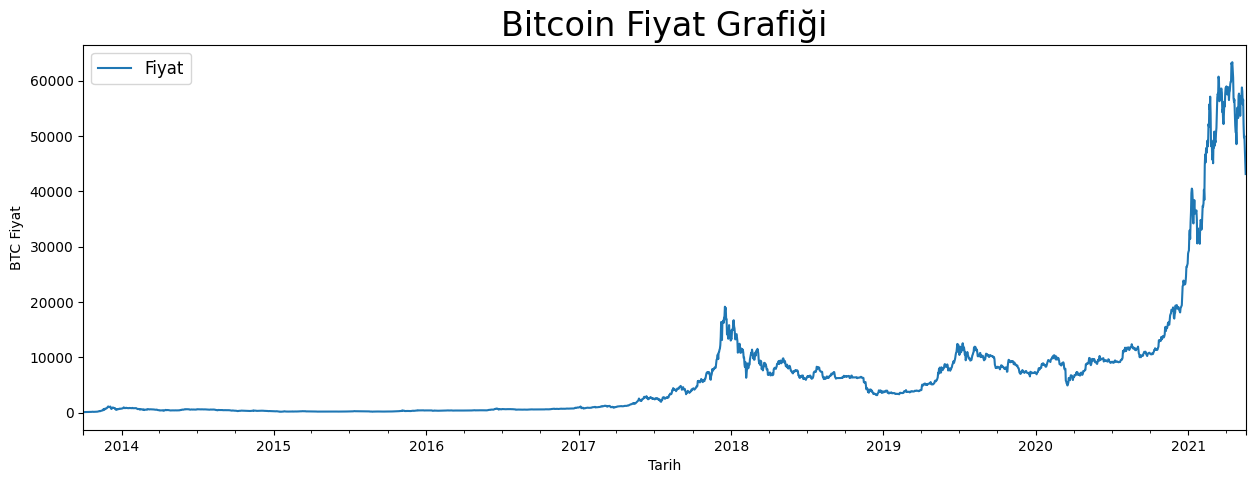

In [239]:
import matplotlib.pyplot as plt

fiyatlar.plot(figsize = (15,5))
plt.xlabel("Tarih")
plt.ylabel("BTC Fiyat")
plt.title("Bitcoin Fiyat Grafiƒüi", fontsize = 24)
plt.legend(fontsize = 12);

## A≈üama 2: Eƒüitim ve Test Verileri Olu≈üturma ‚ú®

In [240]:
import numpy as np
# Tarihleri bir dizi olarak saklayalƒ±m.

tarihler = fiyatlar.index.to_numpy()

fiyatlarn = fiyatlar["Fiyat"].to_numpy()

tarihler[:5], fiyatlar[:5]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000'], dtype='datetime64[ns]'),
                 Fiyat
 Date                 
 2013-10-01  123.65499
 2013-10-02  125.45500
 2013-10-03  108.58483
 2013-10-04  118.67466
 2013-10-05  121.33866)

In [241]:
# Verilerin %80 eƒüitim, %20 test olarak b√∂l√ºnmesini istiyoruz.

b√∂lme = int(0.8*len(fiyatlar))

# Eƒüitim verilerini olu≈üturalƒ±m

xtrain, ytrain = tarihler[:b√∂lme], fiyatlar[:b√∂lme]

# Test verilerini olu≈üturalƒ±m

xtest, ytest = tarihler[b√∂lme:], fiyatlar[b√∂lme:]

len(xtrain), len(xtest), len(ytrain), len(ytest)


(2229, 558, 2229, 558)

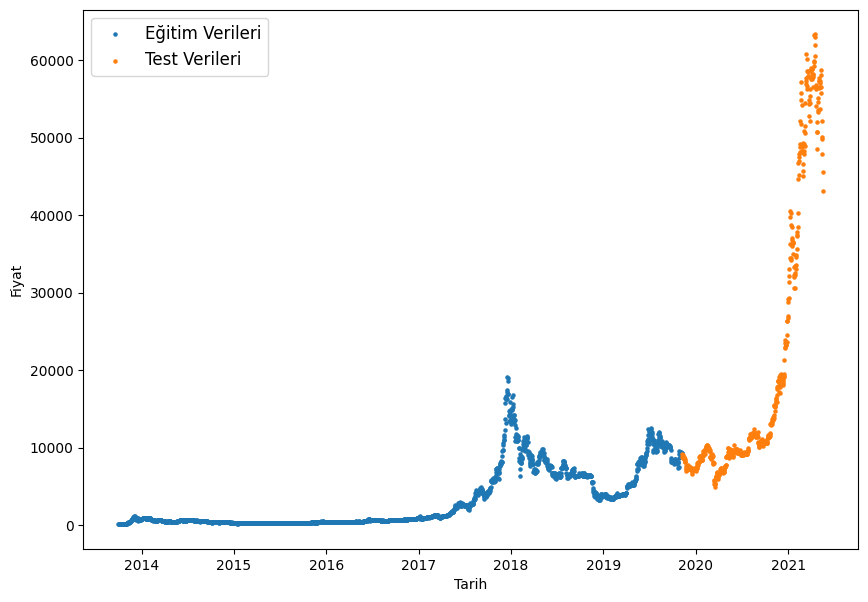

In [242]:
# Eƒüitim ve test verilerimizin bir grafiƒüini √ßizelim.

plt.figure(figsize = (10,7))
plt.scatter(xtrain, ytrain, s = 5, label = "Eƒüitim Verileri")
plt.scatter(xtest, ytest, s = 5, label ="Test Verileri")
plt.xlabel("Tarih")
plt.ylabel("Fiyat")
plt.legend(fontsize = 12)
plt.show();

In [243]:
# ƒ∞leride tahminlerimizi de √ßizdirmek i√ßin kullanabileceƒüimiz bir fonksiyon olu≈üturalƒ±m.

def draw_graph(tarih, deger, format = '.', start = 0, end = None, label = None):
  """
  √úretilen tahminleri ger√ßek deƒüerlerle grafiƒüi kullanarak kar≈üƒ±la≈ütƒ±rma yapmak i√ßin bir grafik √ßizer.

  Parametreler:

  tarih: Fiyat tarihlerini i√ßeren dizi
  deger: Fiyat dizisi
  format: √áizim t√ºr√º
  start: Nereden itibaren √ßizmeye ba≈ülanacaƒüƒ±nƒ± i≈üaretler.
  end: Nereye kadar √ßizileceƒüini i≈üaretler.
  label: √áizilen deƒüerlerin etiketi.
  """

  plt.plot(tarih[start:end], deger[start:end], format, label = label)
  plt.xlabel("Tarih")
  plt.ylabel("Fiyat")
  if label:
    plt.legend(fontsize = 14)
  plt.grid(True)

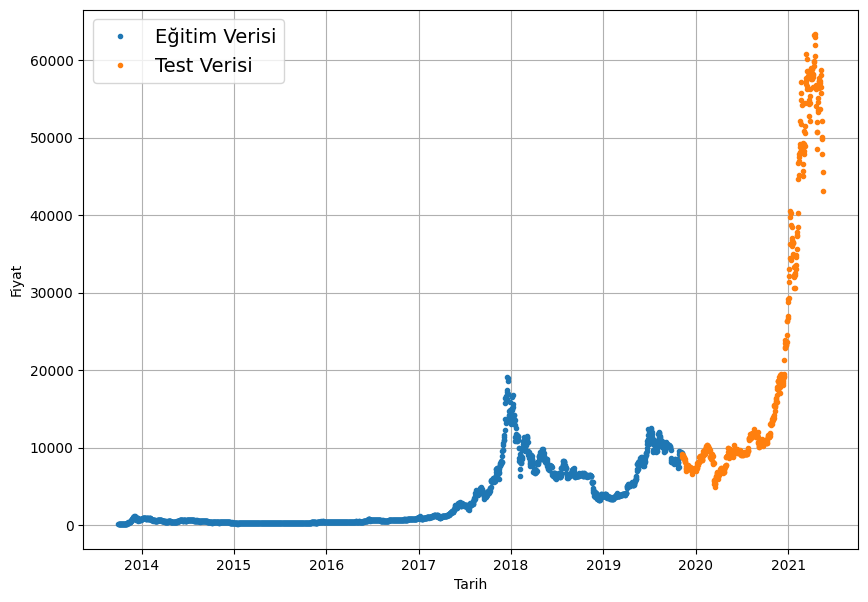

In [244]:
# Fonksiyonumuzu deneyelim.

plt.figure(figsize = (10,7))
draw_graph(tarih=xtrain, deger = ytrain, label = "Eƒüitim Verisi")
draw_graph(tarih = xtest, deger = ytest, label = "Test Verisi")

Fonksiyonumuz √ßalƒ±≈üƒ±yor! Bunu ileride modellerimizin tahminlerini √ßizdirmek i√ßin kullanacaƒüƒ±z.

## A≈üama 3: Model Se√ßimi Ve S√ºre√ß üìã

Projenin tanƒ±tƒ±mƒ±nda belirtildiƒüi gibi, gelecekteki fiyatlarƒ± ge√ßmi≈ü fiyatlarƒ± kullanarak tahmin etmeye √ßalƒ±≈üacaƒüƒ±z. √ñrnek vermek gerekirse, yarƒ±n Bitcoin fiyatƒ±nƒ±n ne olacaƒüƒ±nƒ± tahmin etmek i√ßin, ge√ßen haftaya bakabiliriz. Bu durumda a≈üina olmanƒ±zƒ± istediƒüim iki kavramla √ßalƒ±≈üacaƒüƒ±z. `Aralƒ±k ve Ufuk`.

`Aralƒ±k`: Tahmin i√ßin kullandƒ±ƒüƒ±mƒ±z bitcoin fiyatlarƒ±nƒ±n sayƒ±sƒ±, yani √∂rnekteki ge√ßen 1 haftalƒ±k bitcoin fiyat sayƒ±sƒ±.

`Ufuk`: Tahmin edeceƒüimiz fiyat sayƒ±sƒ±, yani √∂rnekteki 1 g√ºnl√ºk fiyat sayƒ±sƒ±.

> √ñncelikle, bir taban √ßizgisiyle ba≈ülayacaƒüƒ±z. Baz alacaƒüƒ±mƒ±z temel model, hi√ßbir eƒüitim i≈ülemi gerektirmeyecek. Bunun nedeni, temel modelin t√ºm yaptƒ±ƒüƒ±nƒ±n, bir sonraki zaman adƒ±mƒ± deƒüerini tahmin etmek i√ßin √∂nceki zaman adƒ±mƒ± deƒüerini kullanmasƒ±dƒ±r.

Form√ºlize edersek:

$$\hat{y}_{t} = y_{t-1}$$

In [245]:
# Temel tahminleri olu≈üturalƒ±m.

temel_tahminler = ytest[:-1]

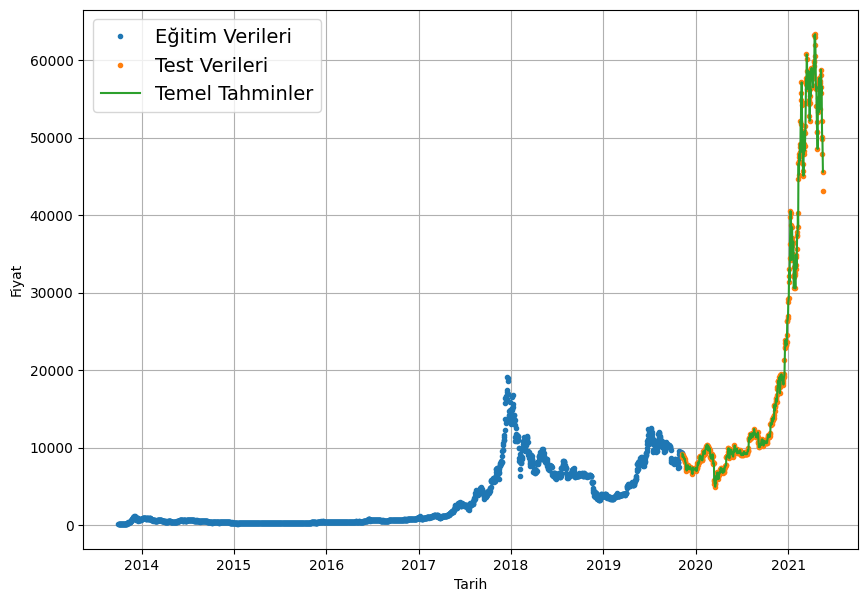

In [246]:
# Temel tahminleri fonksiyonumuzu kullanarak √ßizdirelim.

plt.figure(figsize = (10,7))

draw_graph(tarih = xtrain, deger = ytrain, label = "Eƒüitim Verileri")
draw_graph(tarih = xtest, deger = ytest, label = "Test Verileri")
draw_graph(format = '-',tarih = xtest[1:], deger = temel_tahminler, label = "Temel Tahminler")

Bu grafiƒüi sadece test verileri √ºzerinde √ßizersek:

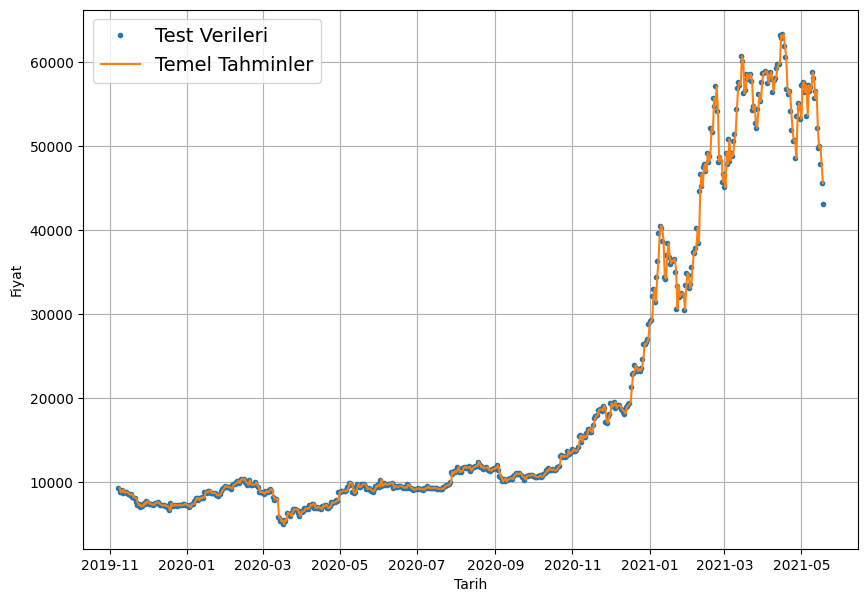

In [247]:
plt.figure(figsize = (10,7))
draw_graph(tarih = xtest, deger = ytest, label = "Test Verileri")
draw_graph(format = '-',tarih = xtest[1:], deger = temel_tahminler, label = "Temel Tahminler")

Bu tabi ki ger√ßek bir yapay zeka modeli deƒüil. Sadece bu tahminleri baz alarak modellerimizi deƒüerlendireceƒüiz.

### Deƒüerlendirme Metrikleri

**MAE**(mean absolute error): $$\frac{1}{n} \sum_{i=1}^{n} \left| y_i - \hat{y}_i \right|$$
**RMSE** (root mean square error): $$\sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}$$

**MAPE**(mean absolute percentage error): $$\frac{1}{n} \sum_{i=1}^{n} \left| \frac{y_i - \hat{y}_i}{y_i} \right| \times 100$$

**sMAPE**(symmetric mean absolute percentage error): $$\frac{1}{n} \sum_{i=1}^{n} \frac{\left| y_i - \hat{y}_i \right|}{(y_i + \hat{y}_i)/2} \times 100
$$

**MASE**(mean absolute scaled error):
$$\frac{\frac{1}{n} \sum_{t=1}^{n} \left| y_t - \hat{y}_t \right|}{\frac{1}{n-1} \sum_{t=2}^{n} \left| y_t - y_{t-1} \right|}
$$

In [248]:
# Model √ºzerinde deƒüerlendirme yapmak i√ßin, bir fonksiyon yazacaƒüƒ±z.
import tensorflow as tf
def tahminleri_degerlendir(ytrue, ypred):
  # Hesaplama yapmak i√ßin deƒüerlerin float32 bi√ßiminde olduƒüuna emin olalƒ±m.
  ytrue = tf.cast(ytrue, dtype = tf.float32)
  ypred = tf.cast(ypred, dtype = tf.float32)

  # Metrikleri kullanarak hesaplama yapmak

  mae = tf.keras.metrics.mean_absolute_error(ytrue, ypred)
  mse = tf.keras.metrics.mean_squared_error(ytrue, ypred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(ytrue, ypred)
  x = tf.reduce_mean(tf.abs(ytrue[1:] - ytrue[:-1]))
  mase = mae / x

  if mae.ndim > 0:
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [249]:
# Fonksiyonu temel tahminlerle denemek

temel_tahmin_sonu√ßlarƒ± = tahminleri_degerlendir(ytrue = ytest[1:],
                                                ypred = temel_tahminler)

In [250]:
temel_tahmin_sonu√ßlarƒ±

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 567.9802,
 'mape': 2.5165248,
 'mase': 0.99957}

MAE metriƒüi bize, sonu√ßlarƒ±n ger√ßek sonu√ßlardan ~$567 farklƒ± olduƒüunu s√∂yl√ºyor.

### Verileri Nasƒ±l Kullanacaƒüƒ±z ?

Yukarƒ±da sizlere Aralƒ±k ve Ufuk'tan bahsetmi≈ütim. Haftalƒ±k deƒüerleri baz aldƒ±ƒüƒ±mƒ±zda, bizim modelimiz a≈üaƒüƒ±daki gibi bir i≈ülem yapacak :

```
[0,1,2,3,4,5,6] -> [7]
[1,2,3,4,5,6,7] -> [8]
[2,3,4,5,6,7,8] -> [9]
```
Buradaki aralƒ±k deƒüerimiz 7, ufuk deƒüerimiz 1'dir.



In [251]:
ARALIK = 7
UFUK = 1

In [252]:
# Aralƒ±ktaki deƒüerleri etiketlemek i√ßin bir fonksiyon yazalƒ±m.

def etiketle(x, ufuk =1):
  """
  Aralƒ±k dizisini etiketler.
  """
  return x[:,:-ufuk], x[:, -ufuk:]

In [253]:
# Fonksiyonun ne yaptƒ±ƒüƒ±na bir g√∂z atalƒ±m.

example_array = [1,2,3,4,5,6,7,8]

ta, tl = etiketle(tf.expand_dims(example_array, axis = 0), ufuk = UFUK)
print(f"Aralƒ±k: {tf.squeeze(ta).numpy()} -> Etiket: {tf.squeeze(tl).numpy()}")

Aralƒ±k: [1 2 3 4 5 6 7] -> Etiket: 8


In [254]:
# Dizileri aralƒ±k-etiket ikilisine d√∂n√º≈üt√ºren bir fonksiyon yazalƒ±m.

def arala(x, aralik = 7, ufuk = 1):
  aa = np.expand_dims(np.arange(aralik + ufuk),axis = 0)

  ai = aa + np.expand_dims(np.arange(len(x) - (aralik + ufuk - 1)), axis = 0).T

  arr = x[ai]

  ars, et = etiketle(arr, ufuk = ufuk)

  return ars, et

In [255]:
# Fonksiyonu deneyelim

aralik_dizisi, aralik_etiketi = arala(fiyatlarn, aralik = ARALIK, ufuk = UFUK)
len(aralik_dizisi), len(aralik_etiketi)

(2780, 2780)

In [256]:
# Nasƒ±l g√∂r√ºn√ºyor

for i in range(3):
     print(f"Aralƒ±k: {aralik_dizisi[i]} -> Etiket: {aralik_etiketi[i]}")

Aralƒ±k: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] -> Etiket: [123.033]
Aralƒ±k: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] -> Etiket: [124.049]
Aralƒ±k: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] -> Etiket: [125.96116]


Model eƒüitmeden √∂nce, onlarƒ± eƒüitim ve test serisi olarak b√∂lmeliyiz. Bunun i√ßin bir fonskiyon yazmayƒ± d√º≈ü√ºn√ºyorum.

In [257]:
def veri_bol(aralik_dizisi, aralik_etiketi, oran = 0.2):

  bo = int(len(aralik_dizisi)* (1-oran))
  egitim_aralik = aralik_dizisi[:bo]
  egitim_etiket = aralik_etiketi[:bo]
  test_aralik = aralik_dizisi[bo:]
  test_etiket = aralik_etiketi[bo:]

  return egitim_aralik, egitim_etiket,test_aralik, test_etiket

In [258]:
egitim_aralik, egitim_etiket, test_aralik, test_etiket = veri_bol(aralik_dizisi, aralik_etiketi)


len(egitim_aralik), len(egitim_etiket), len(test_aralik), len(test_etiket)

(2224, 2224, 556, 556)

In [259]:
egitim_aralik[:10], egitim_etiket[:10]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  ],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  ],
        [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
         125.96116],
        [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
         125.27966],
        [120.65533, 121.795  , 123.033  , 124.049  , 125.96116, 125.27966,
         125.9275 ],
        [121.795  , 123.033  , 124.049  , 125.96116, 125.27966, 125.9275 ,
         126.38333],
        [123.033  , 124.049  , 125.96116, 125.27966, 125.9275 , 126.38333,
         135.24199],
        [124.049  , 125.96116, 125.27966, 125.9275 , 126.38333, 135.24199,
         133.20333],
        [125.96116, 125.27966, 125.9275 , 126.38333, 135.24199, 133.20333,
         142.76333]]),
 array([[123.033  ],
        [124.049 

`ModelCheckpoint`, derin √∂ƒürenme k√ºt√ºphanelerinde (√ßoƒüunlukla Keras gibi) kullanƒ±lan bir geri√ßaƒüƒ±rƒ±m (callback) i≈ülevi veya bile≈üenidir. Model eƒüitimi sƒ±rasƒ±nda kullanƒ±lƒ±r ve modelin belirli aralƒ±klarla veya belirli bir kriteri kar≈üƒ±ladƒ±ƒüƒ±nda kaydedilmesini saƒülar. Bu sayede eƒüitim sƒ±rasƒ±nda elde edilen en iyi model aƒüƒ±rlƒ±klarƒ± kaydedilir ve eƒüitim sona erdikten sonra bu aƒüƒ±rlƒ±klar kullanƒ±larak model deƒüerlendirmesi veya tahminlemeler yapƒ±labilir.

> ModelCheckpoint geri√ßaƒüƒ±rƒ±mƒ±, eƒüitim sƒ±rasƒ±nda fit i≈ülevi sƒ±rasƒ±nda verilen parametreler arasƒ±nda yer alƒ±r ve a≈üaƒüƒ±daki ama√ßlarƒ± ger√ßekle≈ütirir:

* Model Kaydetme: Eƒüitim sƒ±rasƒ±nda en iyi performansa sahip model aƒüƒ±rlƒ±klarƒ±nƒ± kaydeder. Bu, eƒüitim sƒ±rasƒ±nda doƒüruluk (accuracy), kayƒ±p (loss) veya diƒüer metriklerin en iyi deƒüerlere sahip olduƒüu noktalarda kullanƒ±≈ülƒ±dƒ±r.

* Overfitting'i Engellemek: Eƒüitim ilerledik√ße, model eƒüitim verilerine a≈üƒ±rƒ± uyum saƒülayabilir (overfitting). ModelCheckpoint kullanarak en iyi doƒüruluk elde edildiƒüinde modelin aƒüƒ±rlƒ±klarƒ±nƒ± kaydedebilir ve bu aƒüƒ±rlƒ±klarƒ± kullanarak overfitting'i √∂nlemek i√ßin modeli deƒüerlendirebilirsiniz.

Bir callback fonksiyonu yazalƒ±m.

In [260]:
import os

def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name),
                                            verbose=0,
                                            save_best_only=True)

K√º√ß√ºk bir ara≈ütƒ±rmadan sonra, √ßok karƒ±≈üƒ±k olmayan bir model kullanmanƒ±n i≈üimizi g√∂receƒüini √∂ƒürenip d√∂nd√ºm. Hadi modeli olu≈üturalƒ±m!

In [ ]:
model = tf.keras.Sequential([

   tf.keras.layers.Dense(128, activation = "relu"),
   tf.keras.layers.Dense(UFUK, activation = "linear")
],
   name = "Model" )

model.compile(loss = "mae",
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ["mae"])


model.fit(x = egitim_aralik,
          y = egitim_etiket,
          epochs = 100,
          verbose = 1,
          batch_size = 128,
          validation_data = (test_aralik, test_etiket),
          callbacks = [create_model_checkpoint(model_name = model.name)])

In [262]:
# Modeli deƒüerlendirelim

model.evaluate(test_aralik, test_etiket)

18/18 [==============================] - 0s 2ms/step - loss: 636.0404 - mae: 636.0404


[636.0404052734375, 636.0404052734375]

Bu sonu√ßlarƒ± √ßok beƒüenmedim. Modelin daha iyi uyum saƒüladƒ±ƒüƒ± bir versiyonunu y√ºkleyelim.

In [263]:
model = tf.keras.models.load_model("model_experiments/Model")
model.evaluate(test_aralik, test_etiket)

18/18 [==============================] - 0s 2ms/step - loss: 567.5858 - mae: 567.5858


[567.5857543945312, 567.5857543945312]

Bu daha iyi... ≈ûimdi i≈üin tahmin olu≈üturma kƒ±smƒ±na giri≈ü yapƒ±yoruz.

In [264]:
def tahmin_et(model, id):
  tahminler = model.predict(id)
  return tf.squeeze(tahminler)

In [265]:
model_tahminleri = tahmin_et(model, test_aralik)

model_tahminleri[:5]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(5,), dtype=float32, numpy=array([8869.286, 8784.635, 9035.483, 8776.657, 8737.055], dtype=float32)>

Metriklere g√∂re modelimizin performansƒ±na bir g√∂z atalƒ±m.

In [266]:
sonuclar = tahminleri_degerlendir(ytrue = tf.squeeze(test_etiket),
                                  ypred = model_tahminleri)
sonuclar

{'mae': 567.58575,
 'mse': 1166633.0,
 'rmse': 1080.1079,
 'mape': 2.5306132,
 'mase': 0.99709094}

In [267]:
temel_tahmin_sonu√ßlarƒ±

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 567.9802,
 'mape': 2.5165248,
 'mase': 0.99957}

Temel tahmin sonu√ßlarƒ±na √ßok yakƒ±n bir skor elde ettik. Kendimi g√ºzel bir tatlƒ± ile √∂d√ºllendirip hemen d√∂neceƒüim.

Tahminleri bir de grafikte g√∂rmeye ne dersiniz?

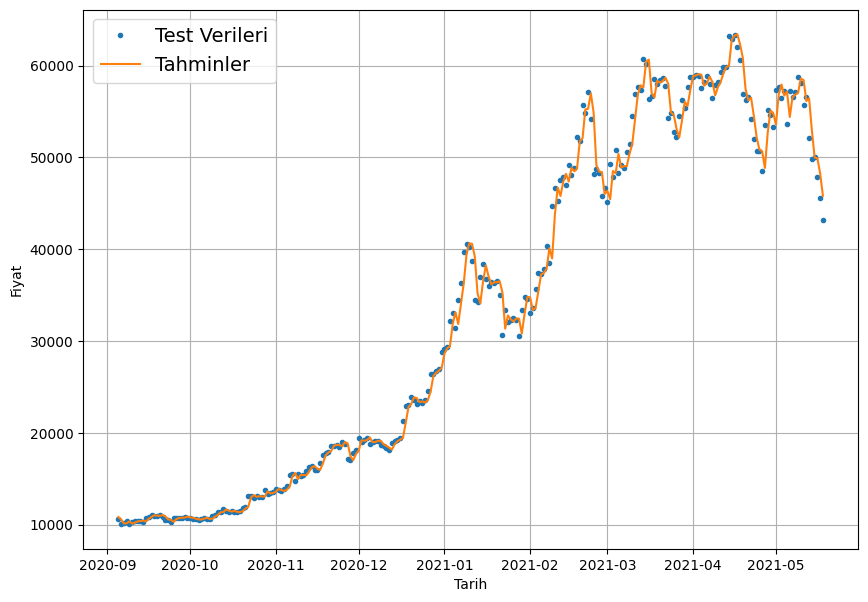

In [268]:
offset = 300

plt.figure(figsize = (10,7))

draw_graph(tarih = xtest[-len(test_aralik):], deger = test_etiket[:,0],start = offset, label = "Test Verileri")
draw_graph(tarih = xtest[-len(test_aralik):], deger = model_tahminleri,start = offset, label = "Tahminler", format = '-')

Bitcoin blok √∂d√ºl√º miktarƒ±, bir ki≈üinin bir Bitcoin bloƒüunu madencilik yoluyla √ßƒ±kardƒ±ƒüƒ±nda aldƒ±ƒüƒ± Bitcoin miktarƒ±nƒ± ifade eder.

Ba≈ülangƒ±√ßta, Bitcoin blok √∂d√ºl√º miktarƒ± 50 idi.

Ancak yakla≈üƒ±k d√∂rt yƒ±lda bir, Bitcoin blok √∂d√ºl√º yarƒ± yarƒ±ya d√º≈üer.

√ñrneƒüin, blok √∂d√ºl√º miktarƒ± 50'den (Ocak 2009'da ba≈ülayarak) 28 Kasƒ±m 2012'de 25'e d√º≈üt√º.

A≈üaƒüƒ±daki linkten blok √∂d√ºlleri ile ilgili i≈üimize yaracak verileri toparladƒ±m.
(https://www.cmcmarkets.com/en/learn-cryptocurrencies/bitcoin-halving).

In [269]:
blok_od1 = 25 # 28 Kasƒ±m 2012
blok_od2 = 12.5 # 9 Haziran 2016
blok_od3 = 6.25 # 11 Mayƒ±s 2020

# Blok √∂d√ºl√º tarihleri

blok_od1_tarih = np.datetime64("2012-11-28")
blok_od2_tarih = np.datetime64("2016-07-09")
blok_od3_tarih = np.datetime64("2020-05-11")

# Farklƒ± blok tarihlerini eklemek i√ßin tarih dizinlerini alalƒ±m.

blok_od1_g = (blok_od2_tarih - fiyatlar.index[0]).days
blok_od2_g = (blok_od3_tarih - fiyatlar.index[0]).days

blok_od1_g, blok_od2_g

(1012, 2414)

In [270]:
# Blok √∂d√ºl√º √∂zelliƒüini verilerimize ekleyelim

fiyatlar_blok = fiyatlar.copy()
fiyatlar_blok["blok_odulu"] = None

fiyatlar_blok.iloc[:blok_od1_g, -1] = blok_od1
fiyatlar_blok.iloc[blok_od1_g:blok_od2_g, -1] = blok_od2
fiyatlar_blok.iloc[blok_od2_g:, -1] = blok_od3
fiyatlar_blok.head()

Fiyat blok_odulu
Date                            
2013-10-01  123.65499         25
2013-10-02  125.45500         25
2013-10-03  108.58483         25
2013-10-04  118.67466         25
2013-10-05  121.33866         25

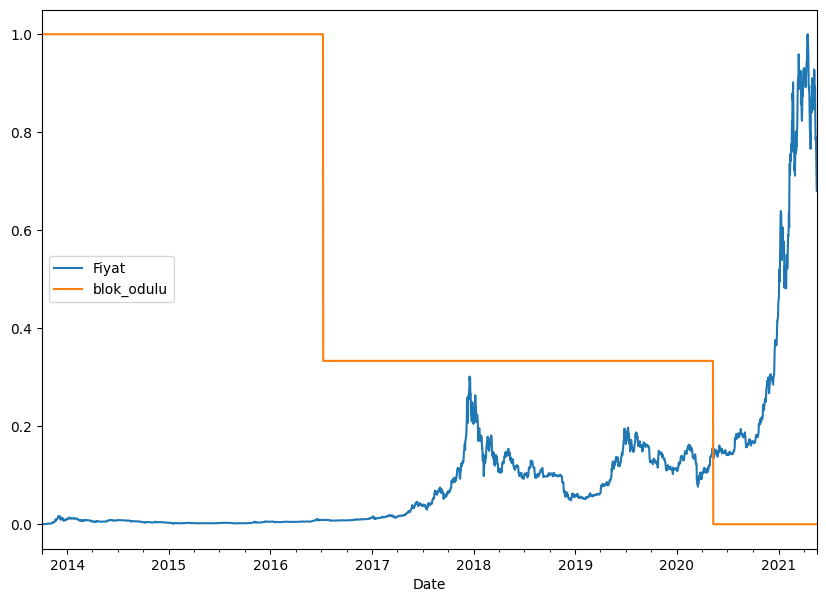

In [271]:
# √áizdirip neye benzediƒüini g√∂relim


from sklearn.preprocessing import minmax_scale

fiyat_blok_df = pd.DataFrame(minmax_scale(fiyatlar_blok[["Fiyat", "blok_odulu"]])
,columns = fiyatlar_blok.columns,
                                     index = fiyatlar_blok.index)
fiyat_blok_df.plot(figsize = (10,7));

G√∂z atarsak blok √∂d√ºl√º y√ºksekken fiyatlarƒ±n d√º≈ü√ºk, ortayken orta, d√º≈ü√ºkken y√ºksek (ters orantƒ±lƒ±) olduƒüunu g√∂zlemleyebiliyoruz. Tahminlerimizde bunu da kullanalƒ±m.

## A≈üama 4: Geleceƒüe Y√∂nelik Tahminler ‚ùá

In [272]:
# Yeni √∂zelliƒüimizle aralanmƒ±≈ü bir veriseti olu≈üturalƒ±m

avs = fiyatlar_blok.copy()

# Aralanmƒ±≈ü s√ºtunlarƒ± ekleyelim
for i in range(ARALIK):
  avs[f"Fiyat + {i+1}"] = avs["Fiyat"].shift(periods = i+1)
avs.head(10)

Fiyat blok_odulu  Fiyat + 1  Fiyat + 2  Fiyat + 3  Fiyat + 4  \
Date                                                                           
2013-10-01  123.65499         25        NaN        NaN        NaN        NaN   
2013-10-02  125.45500         25  123.65499        NaN        NaN        NaN   
2013-10-03  108.58483         25  125.45500  123.65499        NaN        NaN   
2013-10-04  118.67466         25  108.58483  125.45500  123.65499        NaN   
2013-10-05  121.33866         25  118.67466  108.58483  125.45500  123.65499   
2013-10-06  120.65533         25  121.33866  118.67466  108.58483  125.45500   
2013-10-07  121.79500         25  120.65533  121.33866  118.67466  108.58483   
2013-10-08  123.03300         25  121.79500  120.65533  121.33866  118.67466   
2013-10-09  124.04900         25  123.03300  121.79500  120.65533  121.33866   
2013-10-10  125.96116         25  124.04900  123.03300  121.79500  120.65533   

            Fiyat + 5  Fiyat + 6  Fiyat + 7  
Date                                         
2013-10-01        NaN        NaN        NaN  
2013-10-02        NaN        NaN        NaN  
2013-10-03        NaN        NaN        NaN  
2013-10-04        NaN        NaN        NaN  
2013-10-05        NaN        NaN        NaN  
2013-10-06  123.65499        NaN        NaN  
2013-10-07  125.45500  123.65499        NaN  
2013-10-08  108.58483  125.45500  123.65499  
2013-10-09  118.67466  108.58483  125.45500  
2013-10-10  121.33866  118.67466  108.58483

In [273]:
# Veri setimizdeki bo≈üluklarƒ± kaldƒ±ralƒ±m; features ve target olu≈üturalƒ±m

x = avs.dropna().drop(["Fiyat", "blok_odulu"], axis = 1).astype(np.float32)
y = avs.dropna()["Fiyat"].astype(np.float32)

x.head()

Fiyat + 1   Fiyat + 2   Fiyat + 3   Fiyat + 4   Fiyat + 5  \
Date                                                                     
2013-10-08  121.794998  120.655327  121.338661  118.674660  108.584831   
2013-10-09  123.032997  121.794998  120.655327  121.338661  118.674660   
2013-10-10  124.049004  123.032997  121.794998  120.655327  121.338661   
2013-10-11  125.961159  124.049004  123.032997  121.794998  120.655327   
2013-10-12  125.279663  125.961159  124.049004  123.032997  121.794998   

             Fiyat + 6   Fiyat + 7  
Date                                
2013-10-08  125.455002  123.654991  
2013-10-09  108.584831  125.455002  
2013-10-10  118.674660  108.584831  
2013-10-11  121.338661  118.674660  
2013-10-12  120.655327  121.338661

In [274]:
# Verilerimizi i≈üleyelim

final_data = tf.data.Dataset.from_tensor_slices(x)
final_target = tf.data.Dataset.from_tensor_slices(y)

data = tf.data.Dataset.zip((final_data, final_target))

BATCH_SIZE = 1024

data = data.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.float32, name=None))>

In [ ]:
# Yeni bir model olu≈üturma

model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation = "relu"),
    tf.keras.layers.Dense(128, activation = "relu"),
    tf.keras.layers.Dense(UFUK)
])

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam())

model.fit(data,
          epochs = 100,
          verbose = 1)

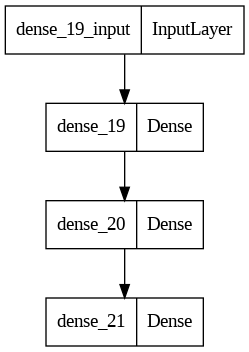

In [276]:
from tensorflow.keras.utils import plot_model
plot_model(model)

Modelimiz b√∂yle basit bir model. Hadi deneyelim.

In [277]:
nd = 14 # gelecek on d√∂rt g√ºn√ºn tahminini yapacaƒüƒ±z.

def gte(deger, model, nd, aralik = ARALIK) -> list:

  gts = []
  sa = deger[-ARALIK:]

  for _ in range(nd):
    gt = model.predict(tf.expand_dims(sa, axis = 0))
    gts.append(tf.squeeze(gt).numpy())
    sa = np.append(sa, gt)[-ARALIK:]
  return gts

In [278]:
gts = gte(deger = y,
          model = model,
          nd = nd)

1/1 [==============================] - 0s 25ms/step


### Geleceƒüe Y√∂nelik Tahminlerimizi √áizdirmek

In [279]:
def gfd(start, nd, offset = 1):
  start = start + np.timedelta64(offset, "D")
  end = start + np.timedelta64(nd, "D")
  return np.arange(start, end, dtype = "datetime64[D]")

In [280]:
son_tarih = fiyatlar.index[-1]
son_tarih

Timestamp('2021-05-18 00:00:00')

In [281]:
tahmin_edilecek_tarihler = gfd(start = son_tarih,
                               nd = nd)
tahmin_edilecek_tarihler

array(['2021-05-19', '2021-05-20', '2021-05-21', '2021-05-22',
       '2021-05-23', '2021-05-24', '2021-05-25', '2021-05-26',
       '2021-05-27', '2021-05-28', '2021-05-29', '2021-05-30',
       '2021-05-31', '2021-06-01'], dtype='datetime64[D]')

In [282]:
tahmin_edilecek_tarihler = np.insert(tahmin_edilecek_tarihler, 0, son_tarih)
gelecek_tahminleri = np.insert(gts, 0, fiyatlarn[-1])
tahmin_edilecek_tarihler, gelecek_tahminleri

(array(['2021-05-18', '2021-05-19', '2021-05-20', '2021-05-21',
        '2021-05-22', '2021-05-23', '2021-05-24', '2021-05-25',
        '2021-05-26', '2021-05-27', '2021-05-28', '2021-05-29',
        '2021-05-30', '2021-05-31', '2021-06-01'], dtype='datetime64[D]'),
 array([43144.473, 55142.504, 50166.47 , 51029.055, 46870.098, 47347.   ,
        44460.297, 50472.355, 52159.78 , 50910.008, 48024.156, 46699.965,
        46099.047, 48272.598, 51599.53 ], dtype=float32))

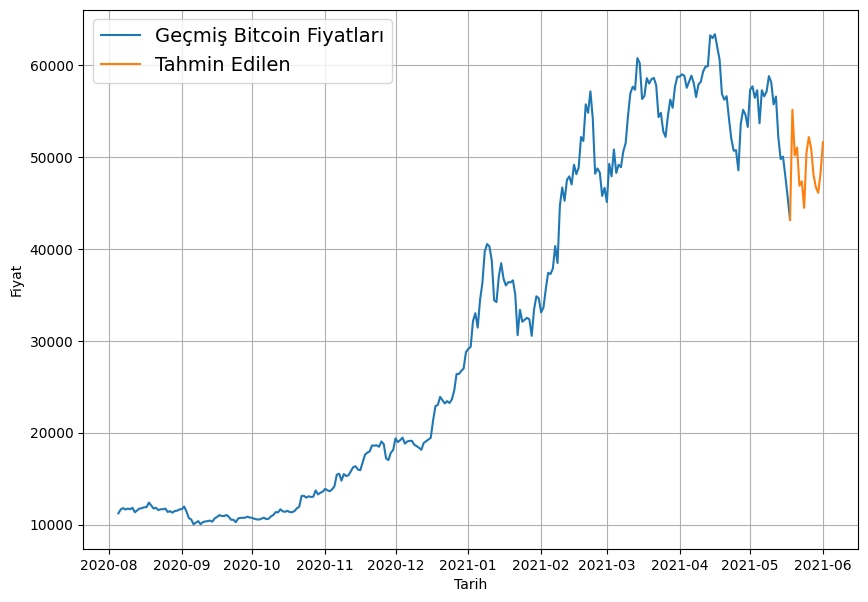

In [283]:
plt.figure(figsize = (10,7))
draw_graph(fiyatlar.index, fiyatlarn, start = 2500, format = "-", label="Ge√ßmi≈ü Bitcoin Fiyatlarƒ±")
draw_graph(tahmin_edilecek_tarihler, gelecek_tahminleri, format = "-", label="Tahmin Edilen")


Mesela, 100 g√ºn sonrasƒ±nƒ± tahmin etseydik ?

1/1 [==============================] - 0s 24ms/step


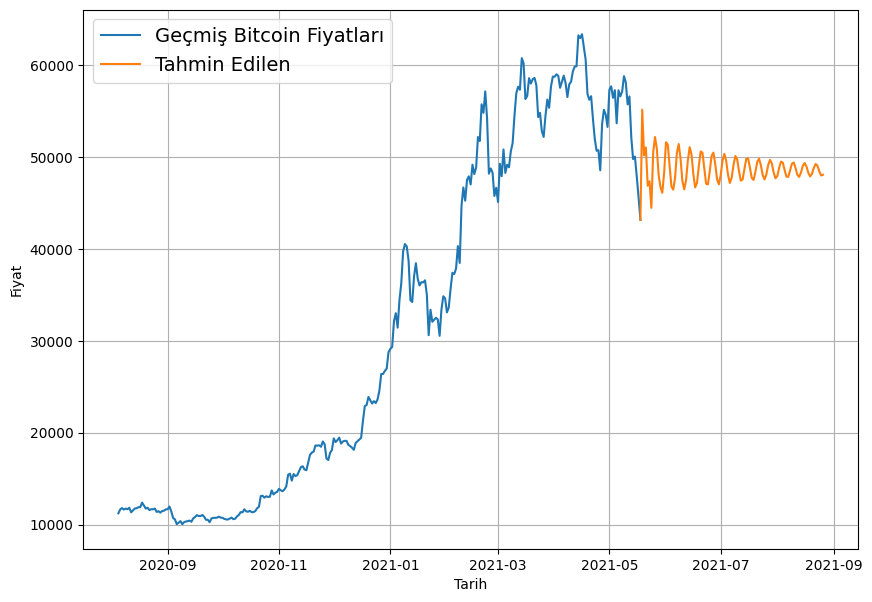

In [284]:
nd = 100
gts = gte(deger = y,
          model = model,
          nd = nd)
son_tarih = fiyatlar.index[-1]

tahmin_edilecek_tarihler = gfd(start = son_tarih,
                               nd = nd)

tahmin_edilecek_tarihler = np.insert(tahmin_edilecek_tarihler, 0, son_tarih)
gelecek_tahminleri = np.insert(gts, 0, fiyatlarn[-1])

plt.figure(figsize = (10,7))
draw_graph(fiyatlar.index, fiyatlarn, start = 2500, format = "-", label="Ge√ßmi≈ü Bitcoin Fiyatlarƒ±")
draw_graph(tahmin_edilecek_tarihler, gelecek_tahminleri, format = "-", label="Tahmin Edilen")


A√ßƒ±k√ßasƒ±, tahminlerimiz bir d√∂ng√ºye giriyor, ve tahmin etme aralƒ±ƒüƒ± uzadƒ±k√ßa modelimiz sa√ßmalƒ±yor. Peki bu neden kaynaklƒ±? Hadi sebebini ara≈ütƒ±ralƒ±m.

## Hindi Problemi ü¶É

Ara≈ütƒ±rdƒ±ƒüƒ±m ve kendi kaynaƒüƒ±mda ≈ü√∂yle bir benzetme okudum:

Bir adam ≈ü√ºkran g√ºn√º i√ßin bir hindi satƒ±n alƒ±yor, hindiyi o g√ºne dek besleyip g√ºzelce bakƒ±yor ve o g√ºn geldiƒüinde hindinin sonu malum. Peki hindi 364 g√ºn beslenip 1 g√ºn hazin sonla kar≈üƒ±la≈üacaƒüƒ±nƒ± nereden tahmin edebilirdi?

Bizim durumumuz da buna benziyor. Her yƒ±l y√ºkselen piyasa bu yƒ±l neden √ßakƒ±lsƒ±n?

K√º√ß√ºk bir deney yapalƒ±m; hindiyi hazin sonuna elimizle ula≈ütƒ±rƒ±p, modelimizin tepkisini √∂l√ßelim.

In [285]:
fiyatlar_cakilan = fiyatlarn.copy()
fiyatlar_cakilan[-1] = fiyatlar_cakilan[-1] / 200

In [286]:
fiyatlar_cakilan[-5:]

array([49764.1320816 , 50032.69313676, 47885.62525472, 45604.61575361,
         215.72235645])

Ger√ßekten sert bir d√º≈ü√º≈ü oldu..

In [287]:
tarihler_cakilan = np.array(fiyatlar.index)
tarihler_cakilan[-10:]

array(['2021-05-09T00:00:00.000000000', '2021-05-10T00:00:00.000000000',
       '2021-05-11T00:00:00.000000000', '2021-05-12T00:00:00.000000000',
       '2021-05-13T00:00:00.000000000', '2021-05-14T00:00:00.000000000',
       '2021-05-15T00:00:00.000000000', '2021-05-16T00:00:00.000000000',
       '2021-05-17T00:00:00.000000000', '2021-05-18T00:00:00.000000000'],
      dtype='datetime64[ns]')

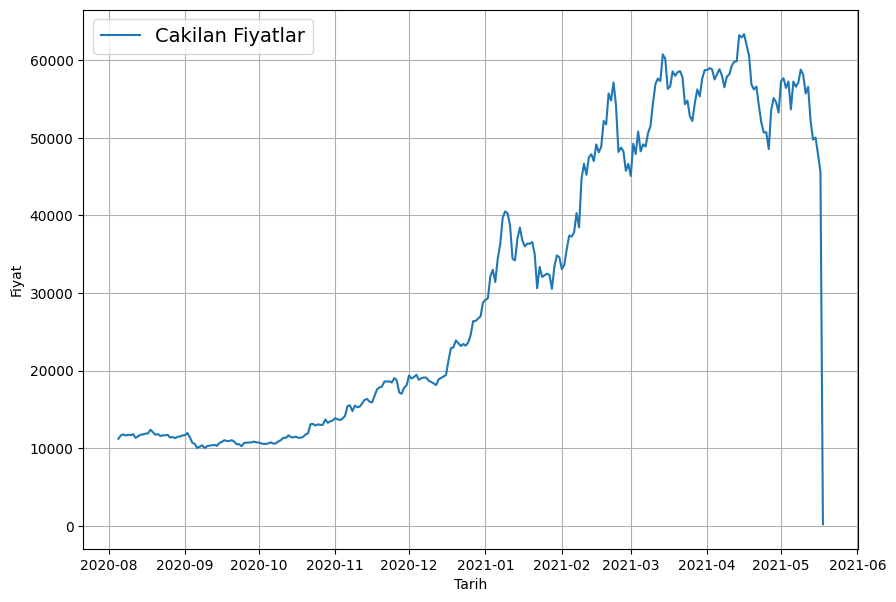

In [288]:
plt.figure(figsize = (10,7))

draw_graph(tarih=tarihler_cakilan,
           deger = fiyatlar_cakilan,
           format = "-",
           label = "Cakilan Fiyatlar",
           start = 2500)

Bu verilerle modelimizi yeniden eƒüiteceƒüiz.

In [289]:
t,f = arala(np.array(fiyatlar_cakilan), aralik= ARALIK, ufuk =UFUK)

xtr,ytr,xt,yt = veri_bol(t,f)
len(xtr),len(xt),len(ytr),len(yt)

(2224, 556, 2224, 556)

In [ ]:
model.fit(xtr, ytr,
          epochs = 100,
          verbose = 0,
          validation_data = (xt, yt),
          callbacks = [create_model_checkpoint(model.name)])

In [291]:
model.evaluate(xt, yt)

18/18 [==============================] - 0s 2ms/step - loss: 715.9399


715.9398803710938

In [292]:
model.name

'sequential_3'

In [293]:
model = tf.keras.models.load_model("model_experiments/sequential_1")
model.evaluate(xt,yt)

18/18 [==============================] - 0s 2ms/step - loss: 641.7886


641.7886352539062

In [294]:
cakilan_tahminler[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8839.744, 8778.162, 9033.314, 8751.406, 8759.279, 8749.982,
       8670.078, 8514.83 , 8468.425, 8525.621], dtype=float32)>

In [295]:
cakilan_tahminler = tahmin_et(model, xt)
sonuclar = tahminleri_degerlendir(ytrue = yt,
                                  ypred = cakilan_tahminler)

sonuclar

18/18 [==============================] - 0s 2ms/step


{'mae': 17137.424,
 'mse': 615030300.0,
 'rmse': 23731.088,
 'mape': 129.85492,
 'mase': 26.504282}

MSE' deki artƒ±≈üƒ± g√∂rd√ºn√ºz m√º ?

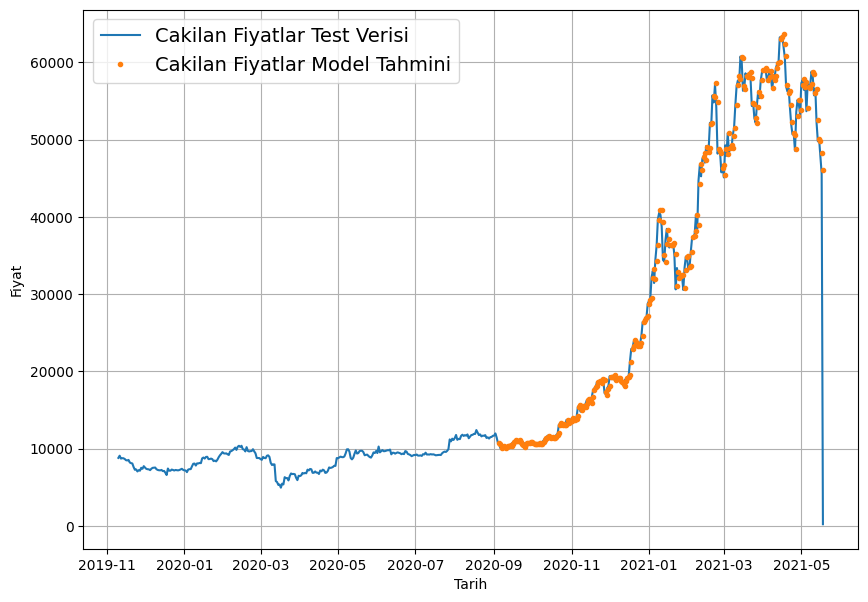

In [296]:
plt.figure(figsize = (10,7))
offset = 300
draw_graph(tarihler_cakilan[-len(xt):],
         fiyatlar_cakilan[-len(yt):],
                                  format = "-",
         label = "Cakilan Fiyatlar Test Verisi")
draw_graph(tarih = tarihler_cakilan[-len(xt):],
         deger = cakilan_tahminler,
         label = "Cakilan Fiyatlar Model Tahmini",
         start = offset)

Bu durum neden ya≈üanƒ±yor?

Neden modelimiz hindi problemi veri noktasƒ±nƒ± yakalayamƒ±yor?

≈ûunu d√º≈ü√ºn√ºn, tƒ±pkƒ± 1000 mutlu g√ºn ya≈üayan bir hindi gibi, sadece g√∂zlemlemeye dayanarak 1001. g√ºn√ºn ge√ßmi≈üteki gibi mutlu olmayacaƒüƒ±na dair hi√ßbir neden yoktur. Aynƒ± ≈üekilde, Bitcoin'in tarih verileri √ºzerinde eƒüitilmi≈ü bir modelin, fiyatƒ±n bir g√ºnde 100 kat d√º≈üt√ºƒü√º tek bir olayƒ±n bulunmadƒ±ƒüƒ± bir ge√ßmi≈ü veri setine sahip olduƒüu durumda, bu t√ºr bir olayƒ±n gelecekte ger√ßekle≈üeceƒüini tahmin etme nedeni yoktur.

Bir model, eƒüitildiƒüi daƒüƒ±lƒ±mƒ±n dƒ±≈üƒ±nda gelecekte herhangi bir ≈üeyi tahmin edemez.

Sonu√ß olarak, tarihsel hareketlere dayanarak (tarihsel hareketlere dayalƒ± olarak) son derece olasƒ± fiyat hareketleri, yukarƒ± veya a≈üaƒüƒ± doƒüru, muhtemelen tahminin bir par√ßasƒ± olmayacaktƒ±r.

## Deƒüerlendirme ve Projeninin 1. B√∂l√ºm√ºn√ºn Kapanƒ±≈üƒ± üìï

Bitcoin fiyatlarƒ±nƒ± etkileyen tek durum ge√ßmi≈üteki fiyatlarƒ± ya da blok √∂d√ºlleri deƒüilidr. ( √ñyle olsaydƒ± bu projeyi payla≈üƒ±r mƒ±ydƒ±m üòÜ)

Fiyatlarƒ±n deƒüi≈üiminde bir √ßok neden etkilidir. Ve bazƒ± nedenler itina ile gizlendiƒüi i√ßin, bu nedenler hakkƒ±nda bir veri toplayabilmemiz pek m√ºmk√ºn deƒüil.

Ancak projenin 2. b√∂l√ºm√ºnde, g√ºndemdeki olaylarƒ±n fiyatlarƒ± nasƒ±l etkilediƒüini deƒüerlendirip ona g√∂re tahmin yapan bir sinir aƒüƒ± in≈üa edeceƒüiz.

G√∂z gezdirdiƒüin i√ßin te≈üekk√ºrler! √ñƒürendiklerimi uygulayarak sizinle payla≈ümak benim i√ßin √ßok kƒ±ymetli!

‚≠ê**Rigel** `Castiel & Balthazar`

Luftwaffe Science & Art AI Org (has been closed.)